In [33]:
import torch
from torch import nn
import  numpy as np

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [60]:
X = torch.rand(100,10)
y = torch.ones(100)
model = nn.Sequential(
    nn.Linear(10,10),
    nn.ReLU(),
    nn.Linear(10,1)
)
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()

model(X).shape

torch.Size([100, 1])

In [61]:
loss_list = []
for _ in  tqdm(range(10000)):
    optimizer.zero_grad()
    out = model(X)
    out = out.detach().numpy()#+0.001*np.random.rand(100,1)
    pseudo_out = torch.FloatTensor(out)
    pseudo_out.requires_grad=True
    
    loss = loss_fn(pseudo_out, y)
    loss_list.append(loss.item())
    loss.backward()
    optimizer.step()

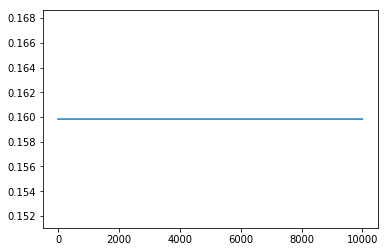

In [62]:
plt.plot(loss_list)

In [63]:
loss_list = []
for _ in  tqdm(range(10000)):
    optimizer.zero_grad()
    out = model(X)
    #out = out.detach().numpy()+0.001*np.random.rand(100,1)
    #pseudo_out = torch.FloatTensor(out)
    #pseudo_out.requires_grad=True
    
    loss = loss_fn(out, y)
    loss_list.append(loss.item())
    loss.backward()
    optimizer.step()

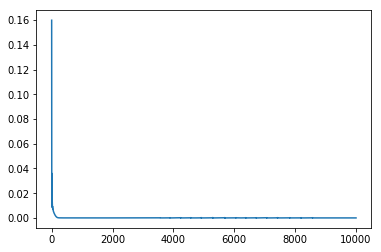

In [64]:
plt.plot(loss_list)

In [53]:
model = nn.Sequential(
    nn.Linear(10,10),
    nn.ReLU(),
    nn.Linear(10,1)
)
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()

model(X).shape

loss_list = []
for _ in  tqdm(range(10000)):
    optimizer.zero_grad()
    out = model(X)
    #out = out.detach().numpy()+0.001*np.random.rand(100,1)
    #pseudo_out = torch.FloatTensor(out)
    #pseudo_out.requires_grad=True
    out += torch.rand(100,1)
    loss = loss_fn(out, y)
    loss_list.append(loss.item())
    loss.backward()
    optimizer.step()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


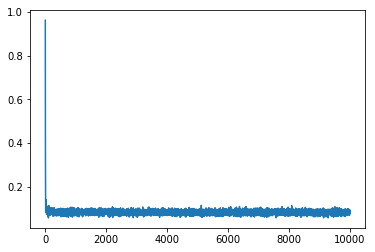

In [54]:
plt.plot(loss_list)

In [77]:
out = model(X)

In [79]:
print(out.grad, out.grad_fn)

None <AddmmBackward object at 0x1203cb978>


In [73]:
out = out.detach().numpy()#+0.001*np.random.rand(100,1)
pseudo_out = torch.FloatTensor(out)
pseudo_out.requires_grad=True

In [81]:
print(pseudo_out.grad, pseudo_out.grad_fn)

None None


In [90]:
pseudo_out.grad_fn == out.grad_fn

False

In [91]:
model = nn.Sequential(
    nn.Linear(10,10),
    nn.ReLU(),
    nn.Linear(10,1)
)
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()

model(X).shape

loss_list = []
for _ in  tqdm(range(10)):
    optimizer.zero_grad()
    O=0
    for i in range(5):
        out = model(X)
        O += out/5
    
    loss = loss_fn(O, y)
    loss_list.append(loss.item())
    loss.backward()
    optimizer.step()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [92]:
loss_list

[0.535713255405426,
 0.438904732465744,
 0.34368467330932617,
 0.25262805819511414,
 0.1705704629421234,
 0.10175292938947678,
 0.050775714218616486,
 0.02094322256743908,
 0.013419056311249733,
 0.025136249139904976]

<bound method Module.buffers of Sequential(
  (0): Linear(in_features=10, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)>